In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



# Data Preparation

- Removed categories in each column that had less than 1% representation in the data.
- Addressed anomalies, including:
  - Columns containing multiple airlines or airports.
  - Misclassified airlines that were actually bus or train companies (before the CSV was created).
- Categorized flight hours into morning, noon, evening, and night.
- Converted the float column for baggage to integers.
- Removed outliers using Tukey's method, focusing on entries with more than one outlier.
- Removed unnecessary columns.
- Created dummy variables to relevant columns.
- Added a day of the week dummy (departure and return)


In [2]:
data=pd.read_csv('WorkDB-28.02.25.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Origin                             179504 non-null  object 
 1   Destination                        179504 non-null  object 
 2   TTT                                179504 non-null  int64  
 3   LOS                                179504 non-null  int64  
 4   Departure Time                     179504 non-null  object 
 5   Departure Date                     179504 non-null  object 
 6   Arrival Time                       179504 non-null  object 
 7   Return Departure Time              179504 non-null  object 
 8   Return Date                        179504 non-null  object 
 9   Return Arrival Time                179504 non-null  object 
 10  Onward Departure Airport           179504 non-null  object 
 11  Onward Arrival Airport             1795

In [4]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')

In [5]:
data['Departure DateTime String']=(data['Departure Date']+' '+data['Departure Time'])
data['Return DateTime String']=(data['Return Date']+' '+data['Return Departure Time'])


In [6]:
data['Departure DateTime']=pd.to_datetime(data['Departure DateTime String'],format='%d/%m/%Y %H:%M')
data['Return DateTime']=pd.to_datetime(data['Return DateTime String'],format='%d/%m/%Y %H:%M')

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


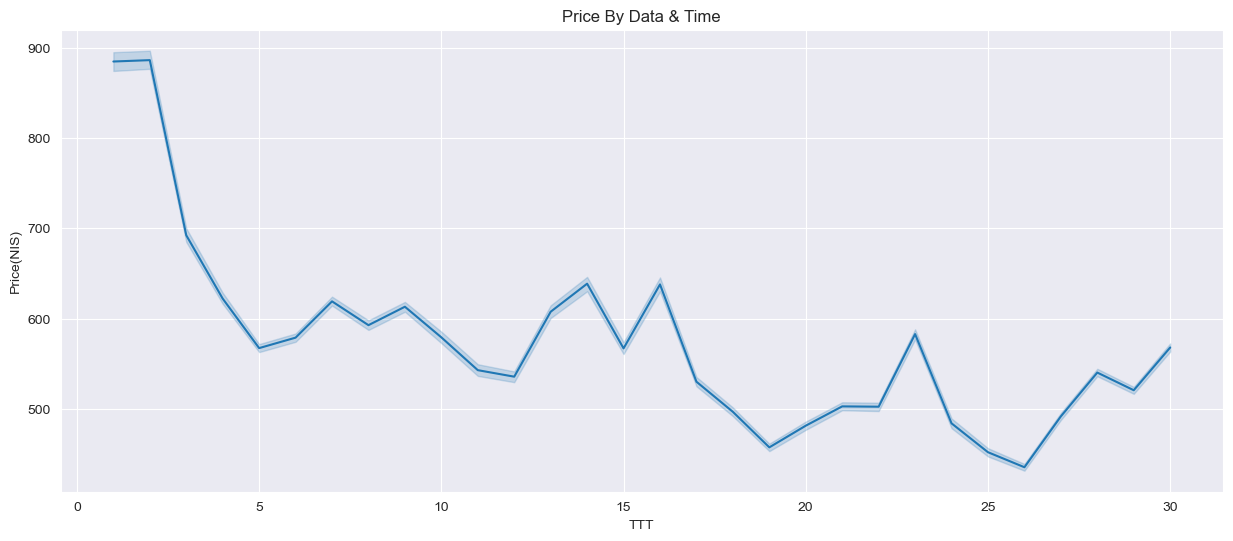

In [7]:
#Mean Price if there are 2 x's with the same value 
plt.figure(figsize=(15, 6))
sns.lineplot(data=data,x='TTT',y='Price(NIS)')
plt.ylabel("Price(NIS)")
plt.title("Price By Data & Time")
plt.show()

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


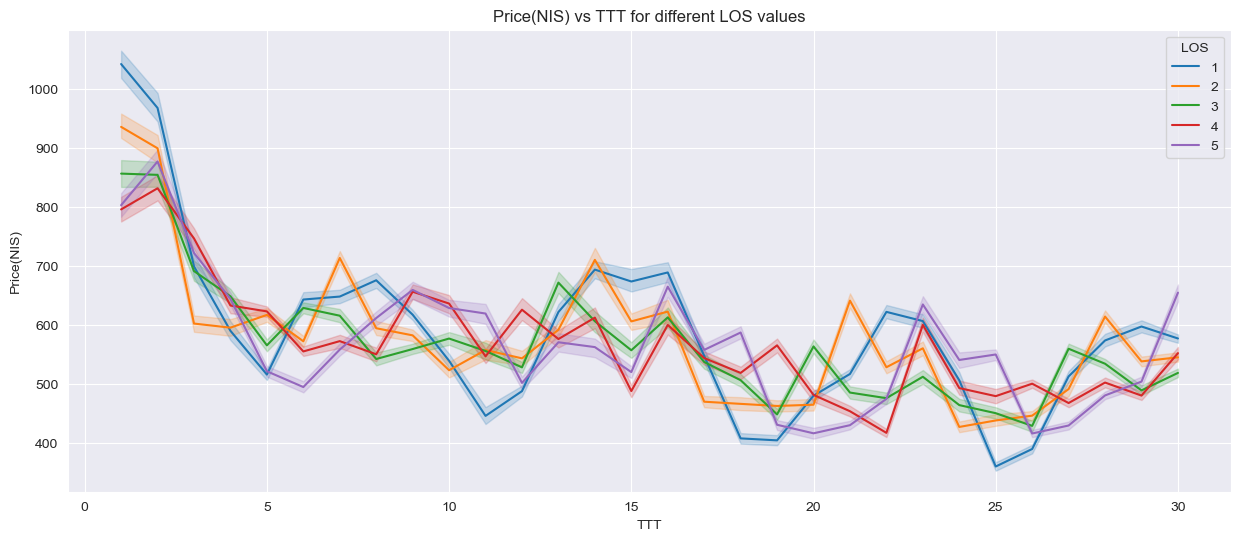

In [8]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='TTT', y='Price(NIS)', hue='LOS', data=data,palette="tab10")

plt.title('Price(NIS) vs TTT for different LOS values')
plt.xlabel('TTT')
plt.ylabel('Price(NIS)')
plt.legend(title='LOS')
plt.show()

**Data Preparation:**

In [9]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure DateTime String',
       'Return DateTime String', 'Departure DateTime', 'Return DateTime'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  object        
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  object        
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Air

In [11]:
data['Onward Airlines'].unique()

array(['Air France', 'Transavia France', 'easyJet', 'Vueling', 'Ryanair',
       'ITA Airways', 'Wizz Air', 'Iberia', 'Transavia France, Wizz Air',
       'Vueling, Ryanair', 'Vueling, Wizz Air', 'Ryanair, ITA Airways',
       'Ryanair, Wizz Air', 'Jet2', 'British Airways',
       'ITA Airways, Ryanair', 'Wizz Air, Wizz Air', 'Ryanair, easyJet',
       'Wizz Air, Ryanair', 'Aeroitalia, Ryanair',
       'Scandinavian Airlines', 'ITA Airways, Wizz Air', 'Eurowings',
       'Tunisair', 'Wizz Air, easyJet', 'Ryanair, Ryanair',
       'Austrian Airlines', 'KLM', 'Norwegian, Ryanair', 'Lufthansa',
       'Ryanair, Vueling', 'Vueling, Transavia France',
       'easyJet, Eurowings', 'Vueling, easyJet', 'Wizz Air, Air Albania',
       'Ryanair, Aeroitalia', 'easyJet, ITA Airways', 'easyJet, Volotea',
       'easyJet, Wizz Air', 'KM Malta Airlines', 'Wizz Air, Aeroitalia',
       'Norwegian', 'SWISS'], dtype=object)

In [12]:
print(data['Onward Airlines'].str.contains(',').sum())
print(data['Return Airlines'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains(',').sum())
print(data['Return Flight Connection Airport'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains('-').sum())
print(data['Return Flight Connection Airport'].str.contains('-').sum())




229
272
1
0
5
2


In [13]:
data['Onward Airlines'] = data['Onward Airlines'].str.split(',').str[0]
data['Return Airlines'] = data['Return Airlines'].str.split(',').str[0]
data['Onward Flight Connection Airport'] = data['Onward Flight Connection Airport'].str.split(',').str[0]
data['Onward Flight Connection Airport'] = data['Onward Flight Connection Airport'].str.split('-').str[0]
data['Return Flight Connection Airport'] = data['Return Flight Connection Airport'].str.split('-').str[0]



In [14]:
print(data['Onward Airlines'].str.contains(',').sum())
print(data['Return Airlines'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains(',').sum())
print(data['Return Flight Connection Airport'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains('-').sum())
print(data['Return Flight Connection Airport'].str.contains('-').sum())




0
0
0
0
0
0


In [15]:
#check for data with less than 1% 
for category in data.columns:
    category_counts = data[category].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < 0.01]
    print(f"Rare categories in '{category}':")
    print(rare_categories)
    print()

Rare categories in 'Origin':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Destination':
Series([], Name: proportion, dtype: float64)

Rare categories in 'TTT':
Series([], Name: proportion, dtype: float64)

Rare categories in 'LOS':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Departure Time':
Departure Time
8:10     0.009732
18:25    0.009643
16:30    0.009498
10:00    0.009437
19:35    0.009415
           ...   
19:30    0.000022
19:10    0.000017
7:45     0.000006
22:30    0.000006
21:50    0.000006
Name: proportion, Length: 166, dtype: float64

Rare categories in 'Departure Date':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Arrival Time':
Arrival Time
18:25      0.009855
19:05      0.009426
16:05      0.009365
20:05      0.009192
12:40      0.009147
             ...   
15:10+1    0.000006
9:05       0.000006
0:50       0.000006
23:20      0.000006
07:10+1    0.000006
Name: proportion, Length: 199, dtype: float64

Rare c

In [16]:
data = data[~data['Onward Departure Airport'].str.contains('SEN')]
data = data[~data['Onward Departure Airport'].str.contains('LCY')]
data = data[~data['Onward Arrival Airport'].str.contains('SEN')]
data = data[~data['Onward Arrival Airport'].str.contains('LCY')]
data = data[~data['Return Departure Airport'].str.contains('SEN')]
data = data[~data['Return Departure Airport'].str.contains('LCY')]
data = data[~data['Return Departure Airport'].str.contains('SOU')]
data = data[~data['Return Arrival Airport'].str.contains('SEN')]
data = data[~data['Return Arrival Airport'].str.contains('LCY')]
data = data[~data['Return Arrival Airport'].str.contains('SOU')]
data = data[~data['Onward Airlines'].str.contains('Iberia')]
data = data[~data['Onward Airlines'].str.contains('Scandinavian Airlines')]
data = data[~data['Onward Airlines'].str.contains('Eurowings')]
data = data[~data['Onward Airlines'].str.contains('Tunisair')]
data = data[~data['Onward Airlines'].str.contains('Lufthansa')]
data = data[~data['Onward Airlines'].str.contains('KLM')]
data = data[~data['Onward Airlines'].str.contains('Norwegian')]
data = data[~data['Onward Airlines'].str.contains('KM Malta Airlines')]
data = data[~data['Onward Airlines'].str.contains('Aeroitalia')]
data = data[~data['Onward Airlines'].str.contains('Austrian Airlines')]
data = data[~data['Onward Airlines'].str.contains('SWISS')]

data = data[~data['Return Airlines'].str.contains('Iberia')]
data = data[~data['Return Airlines'].str.contains('Scandinavian Airlines')]
data = data[~data['Return Airlines'].str.contains('Eurowings')]
data = data[~data['Return Airlines'].str.contains('Tunisair')]
data = data[~data['Return Airlines'].str.contains('Lufthansa')]
data = data[~data['Return Airlines'].str.contains('KLM')]
data = data[~data['Return Airlines'].str.contains('Norwegian')]
data = data[~data['Return Airlines'].str.contains('KM Malta Airlines')]
data = data[~data['Return Airlines'].str.contains('Aeroitalia')]
data = data[~data['Return Airlines'].str.contains('Austrian Airlines')]
data = data[~data['Return Airlines'].str.contains('SWISS')]
data = data[~data['Return Airlines'].str.contains('Volotea')]


In [17]:
data['Checked Bags'].fillna(0,inplace=True)
data['Checked Bags'] = data['Checked Bags'].astype(int)
data['Carry-ons'].fillna(0,inplace=True)
data['Carry-ons'] = data['Carry-ons'].astype(int)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174969 entries, 0 to 179503
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             174969 non-null  object        
 1   Destination                        174969 non-null  object        
 2   TTT                                174969 non-null  int64         
 3   LOS                                174969 non-null  int64         
 4   Departure Time                     174969 non-null  object        
 5   Departure Date                     174969 non-null  object        
 6   Arrival Time                       174969 non-null  object        
 7   Return Departure Time              174969 non-null  object        
 8   Return Date                        174969 non-null  object        
 9   Return Arrival Time                174969 non-null  object        
 10  Onward Departure Airport 

In [19]:
#turn Hour to int
data['Departure Hour']=data['Departure Time'].str.split(':').str[0].astype(int)
data['Arrival Hour']=data['Arrival Time'].str.split(':').str[0].astype(int)
data['Return Departure Hour']=data['Return Departure Time'].str.split(':').str[0].astype(int)
data['Return Arrival Hour']=data['Return Arrival Time'].str.split(':').str[0].astype(int)

def categorize_time(time):
    if 0 <= time < 6:
        return 'Night'
    elif 6 <= time < 12:
        return 'Morning'
    elif 12 <= time < 18:
        return 'Noon'
    else:
        return 'Evening'

data['Onward Departure Time Of Day'] = data['Departure Hour'].apply(categorize_time)
data['Onward Arrival Time Of Day'] = data['Arrival Hour'].apply(categorize_time)
data['Return Departure Time Of Day'] = data['Return Departure Hour'].apply(categorize_time)
data['Return Arrival Time Of Day'] = data['Return Arrival Hour'].apply(categorize_time)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174969 entries, 0 to 179503
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             174969 non-null  object        
 1   Destination                        174969 non-null  object        
 2   TTT                                174969 non-null  int64         
 3   LOS                                174969 non-null  int64         
 4   Departure Time                     174969 non-null  object        
 5   Departure Date                     174969 non-null  object        
 6   Arrival Time                       174969 non-null  object        
 7   Return Departure Time              174969 non-null  object        
 8   Return Date                        174969 non-null  object        
 9   Return Arrival Time                174969 non-null  object        
 10  Onward Departure Airport 

In [21]:
# Function to identify outliers using Tukey's method
def is_outlier(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (column < lower_bound) | (column > upper_bound)

# Identify outliers for each numeric column
numeric_columns = data.select_dtypes(include=['int64', 'int32', 'float64']).columns
outlier_flags = data[numeric_columns].apply(is_outlier)

# Count the number of outlier features for each row
data['outlier_count'] = outlier_flags.sum(axis=1)

# Print the rows and their corresponding outlier features
outlier_details = outlier_flags[data['outlier_count'] >= 2]
print("Rows to be removed and their corresponding outlier features:")
print(outlier_details[outlier_details.any(axis=1)])

# Remove rows with outliers in 2 or more features
rows_before = data.shape[0]
data_filtered = data[data['outlier_count'] < 3]
rows_after = data_filtered.shape[0]

# Drop the 'outlier_count' column as it's no longer needed
data_filtered = data_filtered.drop(columns=['outlier_count'])

print(f"\nTotal rows removed: {rows_before - rows_after}")




Rows to be removed and their corresponding outlier features:
          TTT    LOS  Onward Flight Connections  \
0       False  False                      False   
1       False  False                      False   
2       False  False                      False   
3       False  False                      False   
4       False  False                      False   
...       ...    ...                        ...   
179104  False  False                      False   
179107  False  False                       True   
179111  False  False                      False   
179112  False  False                      False   
179114  False  False                      False   

        Onward Connection Duration(min)  Return Flight Connections  \
0                                 False                      False   
1                                 False                       True   
2                                 False                      False   
3                                 False       

In [22]:
print(data.shape)
print(data_filtered.shape)


(174969, 42)
(171790, 41)


In [23]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171790 entries, 0 to 179503
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             171790 non-null  object        
 1   Destination                        171790 non-null  object        
 2   TTT                                171790 non-null  int64         
 3   LOS                                171790 non-null  int64         
 4   Departure Time                     171790 non-null  object        
 5   Departure Date                     171790 non-null  object        
 6   Arrival Time                       171790 non-null  object        
 7   Return Departure Time              171790 non-null  object        
 8   Return Date                        171790 non-null  object        
 9   Return Arrival Time                171790 non-null  object        
 10  Onward Departure Airport 

In [24]:
data_filtered['Day Of Week Departure']=data['Departure DateTime'].dt.strftime('%A')
data_filtered['Day Of Week Return']=data['Return DateTime'].dt.strftime('%A')



In [25]:
columns_to_drop = ['Origin', 'Destination','Departure Time','Departure Date','Arrival Time','Return Departure Time','Return Date','Return Arrival Time','Onward Flight Connection Airport','Return Flight Connection Airport'
,'Snapshot Time','Departure DateTime String','Departure DateTime','Departure Hour','Arrival Hour','Return Departure Hour','Return Arrival Hour','Return DateTime','Return DateTime String']
data_filtered=data_filtered.drop(columns=columns_to_drop)

In [26]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171790 entries, 0 to 179503
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   TTT                                171790 non-null  int64 
 1   LOS                                171790 non-null  int64 
 2   Onward Departure Airport           171790 non-null  object
 3   Onward Arrival Airport             171790 non-null  object
 4   Return Departure Airport           171790 non-null  object
 5   Return Arrival Airport             171790 non-null  object
 6   Onward Airlines                    171790 non-null  object
 7   Return Airlines                    171790 non-null  object
 8   Onward Flight Connections          171790 non-null  int64 
 9   Onward Connection Duration(min)    171790 non-null  int64 
 10  Return Flight Connections          171790 non-null  int64 
 11  Return Connection Duration(min)    171790 non-null  int64

In [27]:
data_filtered = pd.get_dummies(data_filtered, columns=['Onward Departure Airport', 'Onward Arrival Airport','Return Departure Airport','Return Arrival Airport','Onward Airlines','Return Airlines','Site','Onward Departure Time Of Day','Onward Arrival Time Of Day','Return Departure Time Of Day','Return Arrival Time Of Day','Day Of Week Departure','Day Of Week Return'],drop_first=True)

In [28]:
data_filtered.columns

Index(['TTT', 'LOS', 'Onward Flight Connections',
       'Onward Connection Duration(min)', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Carry-ons', 'Checked Bags',
       'Price(NIS)', 'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Onward Departure Airport_CDG',
       'Onward Departure Airport_CIA', 'Onward Departure Airport_FCO',
       'Onward Departure Airport_LGW', 'Onward Departure Airport_LHR',
       'Onward Departure Airport_LTN', 'Onward Departure Airport_ORY',
       'Onward Departure Airport_STN', 'Onward Arrival Airport_CDG',
       'Onward Arrival Airport_CIA', 'Onward Arrival Airport_FCO',
       'Onward Arrival Airport_LGW', 'Onward Arrival Airport_LHR',
       'Onward Arrival Airport_LTN', 'Onward Arrival Airport_ORY',
       'Onward Arrival Airport_STN', 'Return Departure Airport_CDG',
       'Return Departure Airport_CIA', 'Return Departure Airport_FCO',
       'Return Departure Airport_LGW', 'Return Depa

# Gradient Boosting

In [29]:
"""from sklearn.preprocessing import StandardScaler
continuous_cols = [
    'TTT', 'LOS', 'Onward Connection Duration(min)', 'Return Connection Duration(min)', 
    'Total Onward Flight Duration(min)', 'Total Return Flight Duration(min)','Carry-ons','Checked Bags'
]
scaler = StandardScaler()
data_filtered[continuous_cols] = scaler.fit_transform(data_filtered[continuous_cols])
#NO NEED"""

"from sklearn.preprocessing import StandardScaler\ncontinuous_cols = [\n    'TTT', 'LOS', 'Onward Connection Duration(min)', 'Return Connection Duration(min)', \n    'Total Onward Flight Duration(min)', 'Total Return Flight Duration(min)','Carry-ons','Checked Bags'\n]\nscaler = StandardScaler()\ndata_filtered[continuous_cols] = scaler.fit_transform(data_filtered[continuous_cols])\n#NO NEED"

In [30]:
# Define X (features) and y (target variable)
X = data_filtered.drop(columns=['Price(NIS)'])  # All features except the target
y = data_filtered['Price(NIS)']  # Target variable


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,    # Number of trees (more trees = better learning but slower)
    learning_rate=0.05,  # Step size (lower = better generalization)
    max_depth=5,         # Depth of each tree (higher = more complex)
    subsample=0.8,       # Use 80% of data for each tree (prevents overfitting)
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42, subsample=0.8)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions
y_pred = gbr.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")  # Higher is better (1.0 = perfect prediction)

MAE: 62.03
RMSE: 88.24
R² Score: 0.8811


In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, n_iter=10, cv=3,verbose=2, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.1}


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(**grid_search.best_params_)

# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=700, subsample=0.9)

In [38]:
y_pred = gbr.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")  # Higher is better (1.0 = perfect prediction)

MAE: 34.14
MSE: 2505.12
RMSE: 50.05
R² Score: 0.9617


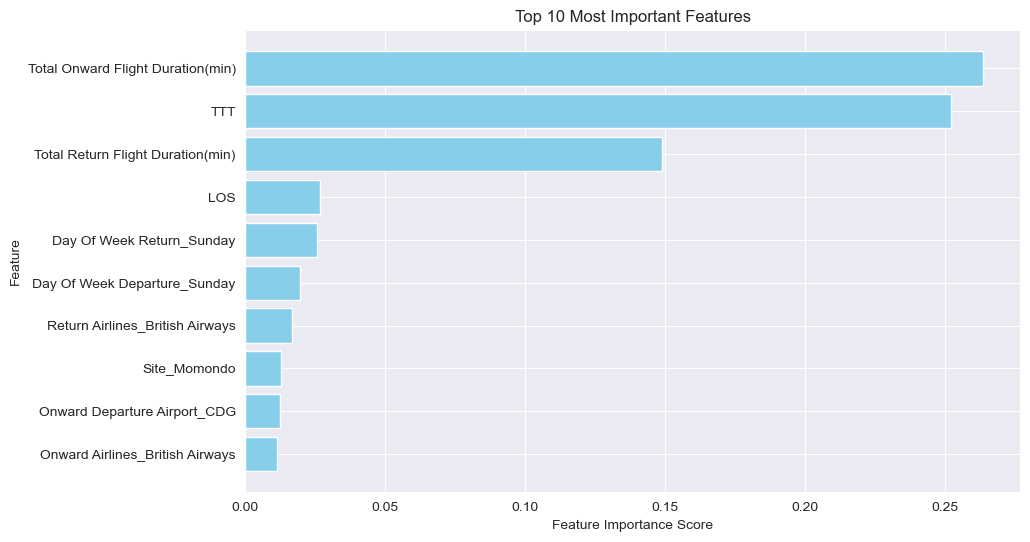

In [39]:
importances = gbr.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

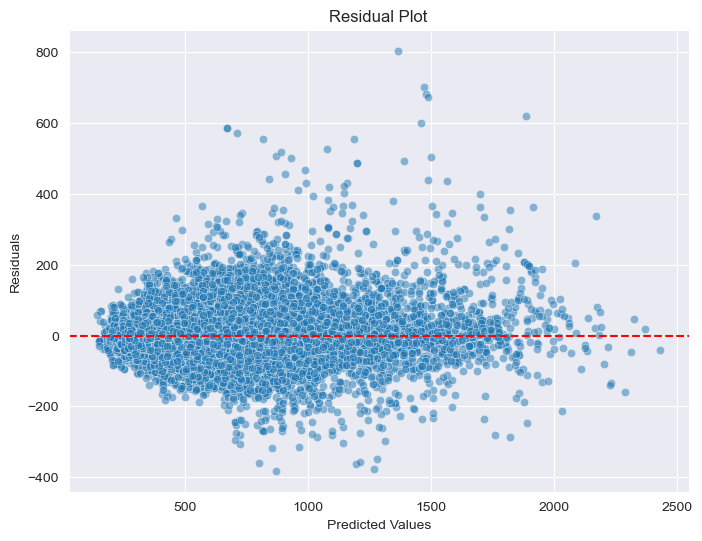

In [40]:
# Residuals = Actual - Predicted
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Conclusion:
The GradientBoostingRegressor model with max_depth=7, n_estimators=700, and subsample=0.9 has demonstrated strong predictive performance, achieving an R² score of 0.9617, indicating that the model explains approximately 96.17% of the variance in flight prices. The relatively low MAE (34.14) and RMSE (50.05) further confirm that the model's predictions are precise, with minimal error.

However, analyzing the residual plot reveals some signs of heteroscedasticity, as residuals tend to spread wider for higher predicted values. This suggests that the model might slightly struggle with extreme price predictions.

The importance is interesting, as sunday, TTT, LOS and flight duration are the most influensial. but here too tehre is British Airlines as next in line, maybe it is because it is not low-cost company. 